In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

In [ ]:
train_data = torchvision.datasets.FashionMNIST(root='.', download=True, train=True , transform=transforms.ToTensor())
test_data = torchvision.datasets.FashionMNIST(root='.', download=True, train=False, transform=transforms.ToTensor())

In [ ]:
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=128)
test_loader = DataLoader(shuffle=False, dataset=test_data, batch_size=128)

In [ ]:
class cnn(nn.Module):

  def __init__(self, k):
    super(cnn, self).__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(1, 32, 3, 2),
        nn.ReLU(),
        nn.Conv2d(32, 64, 3, 2),
        nn.ReLU(),
        nn.Conv2d(64, 128, 3, 2),
        nn.ReLU()
    )
    self.fc = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, k)
    )
  def forward(self, x):
      x = self.conv(x)
      x = x.view(x.size(0), -1)
      x = self.fc(x)
      return x


In [ ]:
model = cnn(k=10)


In [ ]:
model

cnn(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train_model(model, criterion, optimizer, train_loader, test_loader, epoch):

  train_losses = {}
  test_losses = {}

  for it in range(epoch):
    train_loss  = []
    for data, target in train_loader:
      optimizer.zero_grad()

      outputs = model(data)
      loss = criterion(outputs, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()


    train_losses[it]  = np.mean(train_loss)
    test_loss = []
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target)
        test_loss.append(loss.item())
    test_losses[it] = np.mean(test_loss)
    print(f"epoch{it+1}, train_loss: {train_losses[it]}, test_loss: {test_losses[it]}")

  return train_losses, test_losses


In [ ]:
epoch = 20
train_losses, test_losses = train_model(model, criterion, optimizer, train_loader, test_loader, epoch)

epoch1, train_loss: 0.6500868084334107, test_loss: 0.4976919014242631
epoch2, train_loss: 0.42764355585392094, test_loss: 0.41805665506215034
epoch3, train_loss: 0.3658961282927853, test_loss: 0.3827247604539123
epoch4, train_loss: 0.331148358836357, test_loss: 0.3511627139169959
epoch5, train_loss: 0.3040774146249808, test_loss: 0.3349577496889271
epoch6, train_loss: 0.2833307101877768, test_loss: 0.3225078612943239
epoch7, train_loss: 0.2661212778993761, test_loss: 0.3184657745723483
epoch8, train_loss: 0.24935273220861898, test_loss: 0.31713776705385766
epoch9, train_loss: 0.23524250144134962, test_loss: 0.3204807906965666
epoch10, train_loss: 0.22256246881126596, test_loss: 0.30343651582923115
epoch11, train_loss: 0.21035433074495177, test_loss: 0.3155978082478801
epoch12, train_loss: 0.1998154971041659, test_loss: 0.30225437917286835
epoch13, train_loss: 0.18611074580566717, test_loss: 0.31408671864980386
epoch14, train_loss: 0.17802584845660083, test_loss: 0.3172752172509326
epoc

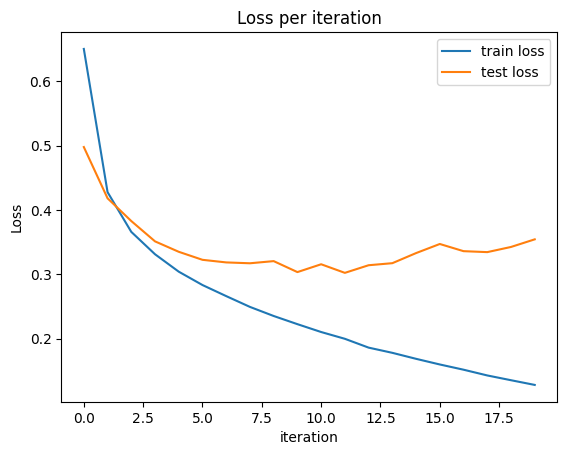

In [ ]:
plt.plot(train_losses.keys(),train_losses.values(), label='train loss')
plt.plot(test_losses.keys(),test_losses.values(), label='test loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.legend()

In [ ]:
train_losses

{0: 0.6500868084334107,
 1: 0.42764355585392094,
 2: 0.3658961282927853,
 3: 0.331148358836357,
 4: 0.3040774146249808,
 5: 0.2833307101877768,
 6: 0.2661212778993761,
 7: 0.24935273220861898,
 8: 0.23524250144134962,
 9: 0.22256246881126596,
 10: 0.21035433074495177,
 11: 0.1998154971041659,
 12: 0.18611074580566717,
 13: 0.17802584845660083,
 14: 0.1687175120943899,
 15: 0.15994184739840056,
 16: 0.15182397922060129,
 17: 0.14289435401940143,
 18: 0.13547959948367655,
 19: 0.12817779586100375}

In [ ]:
n_correct = 0
n_total = 0
for data, target in train_loader:
  output = model(data)
  _, pred = torch.max(output, 1)
  n_correct += (pred==target).sum()
  n_total += len(target)
train_acc = n_correct / n_total
n_correct = 0
n_total = 0
for data, target in test_loader:
  output = model(data)
  _, pred = torch.max(output, 1)
  n_correct += (pred==target).sum()
  n_total += len(target)
test_acc = n_correct / n_total

In [ ]:
train_acc , test_acc

(tensor(0.9578), tensor(0.8953))

[[849   2  24  12   4   1 103   0   5   0]
 [  2 978   2  11   2   0   3   0   2   0]
 [ 17   0 843  11  46   0  82   0   1   0]
 [ 17  12  15 892  30   1  31   0   2   0]
 [  2   1  56  31 793   0 113   0   4   0]
 [  0   0   0   2   0 974   0  18   1   5]
 [ 95   3  57  22  62   0 750   0  11   0]
 [  1   0   0   0   0   5   0 975   1  18]
 [  2   0   7   2   6   1   9   3 970   0]
 [  1   0   0   0   0   7   0  38   0 954]]


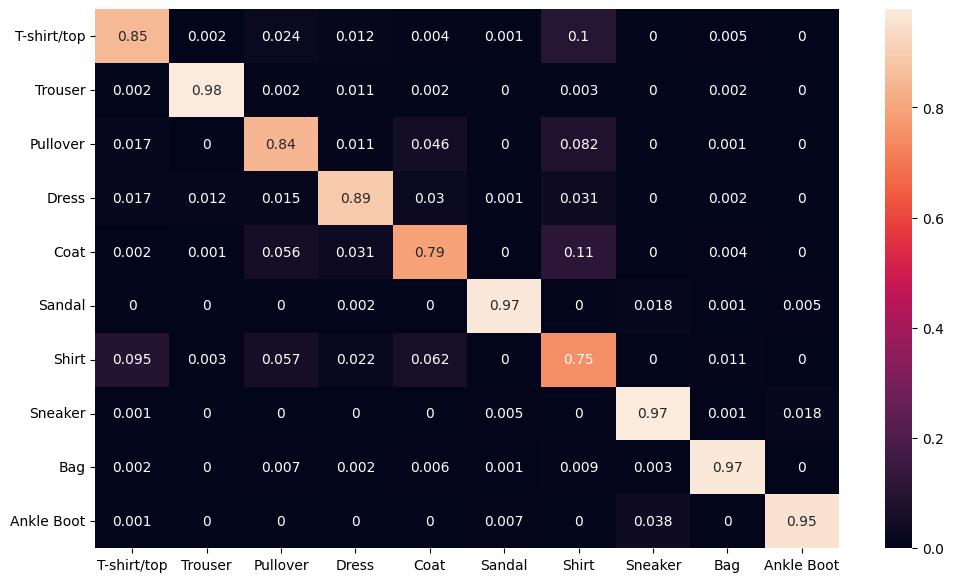

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')
print(cf_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy

In [ ]:
y_test = []
y_pred = []
for data, target in test_loader:

  out = model(data)
  _, pred = torch.max(out,1)
  pred = pred.numpy()
  y_test.extend(target.numpy())
  y_pred.extend(pred)

print(confusion_matrix(y_test, y_pred))




[[839   1  21  15   4   1 113   0   6   0]
 [  2 973   2  13   4   0   6   0   0   0]
 [ 13   2 855   9  41   0  78   0   2   0]
 [ 19   9  14 894  26   1  31   1   5   0]
 [  0   0  55  30 800   0 114   0   1   0]
 [  0   0   0   2   0 972   0  20   0   6]
 [ 91   1  62  23  65   0 750   0   8   0]
 [  0   0   0   0   0  14   0 966   1  19]
 [  1   0   9   3   3   4   8   3 969   0]
 [  1   0   0   0   0   7   0  43   0 949]]


In [ ]:
for data, target in train_loader:
  print(target.data.shape)
  print(data[0].data.shape)
  break

torch.Size([128])
torch.Size([1, 28, 28])
